In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


In [5]:
df.isnull().sum()/len(df)*100

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        0.000000
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        28.888889
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

In [6]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

In [7]:
# Calculate the number of launches per site
launch_counts = df['LaunchSite'].value_counts()

# Display the result
print(launch_counts)

LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64


In [11]:
# Get the number and occurrence of each orbit
orbit_counts = df['Orbit'].value_counts()

# Display the result
print(orbit_counts)


Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64


In [13]:
# Count the number of occurrences of each landing outcome
landing_outcomes = df['Outcome'].value_counts()

# Display the result
print(landing_outcomes)


Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64


In [14]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)
    bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [15]:
# Define the set of bad outcomes
bad_outcome = {'False Ocean', 'False ASDS'}

# Create the landing_class list
landing_class = df['Outcome'].apply(lambda x: 0 if x in bad_outcome else 1)

# Display the result
print(landing_class)


0     1
1     1
2     1
3     0
4     1
     ..
85    1
86    1
87    1
88    1
89    1
Name: Outcome, Length: 90, dtype: int64


In [20]:
# Count the number of successful landings on a drone ship (True ASDS)
successful_drone_ship_landings = df[df['Outcome'] == 'True ASDS'].shape[0]

# Display the result
print(f"The number of successful landings on a drone ship is: {successful_drone_ship_landings}")


The number of successful landings on a drone ship is: 41


In [16]:
df['Class']=landing_class
df[['Class']].head(8)

,Class
0,1
1,1
2,1
3,0
4,1
5,1
6,1
7,1


In [17]:
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,1
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,1
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,1
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,1


In [18]:
df["Class"].mean()

0.9111111111111111

In [19]:
# Count the total number of outcomes
total_missions = df['Outcome'].count()

# Count the number of successful outcomes
successful_missions = df[df['Outcome'] == 'Success'].shape[0]

# Calculate the success rate
success_rate = successful_missions / total_missions

# Display the result
print(f"The success rate is: {success_rate * 100:.2f}%")


The success rate is: 0.00%


In [4]:
%load_ext sql

In [5]:
import csv, sqlite3
import prettytable
prettytable.DEFAULT = 'DEFAULT'

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [6]:
!pip install -q pandas


In [7]:
%sql sqlite:///my_data1.db

In [8]:
import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

In [9]:
#DROP THE TABLE IF EXISTS

%sql DROP TABLE IF EXISTS SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


[]

In [10]:
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
Done.


[]

In [12]:
print(df.columns)


Index(['Date', 'Time (UTC)', 'Booster_Version', 'Launch_Site', 'Payload',
       'PAYLOAD_MASS__KG_', 'Orbit', 'Customer', 'Mission_Outcome',
       'Landing_Outcome'],
      dtype='object')


In [13]:
# Display the unique launch sites
unique_launch_sites = df['Launch_Site'].unique()
print(unique_launch_sites)

['CCAFS LC-40' 'VAFB SLC-4E' 'KSC LC-39A' 'CCAFS SLC-40']


In [16]:
#Display 5 records where launch sites begin with the string 'CCA
df[df['Launch_Site'].str.startswith('CCA')].head(5)


,Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
0,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
1,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of...",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
3,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
4,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [19]:
#Total payload mass carried by boosters launched by NASA
df[df['Customer'] =='NASA (CRS)']['PAYLOAD_MASS__KG_'].sum()


45596

In [21]:
#Average payload mass carried by booster version F9 v1.1
df[df['Booster_Version'] == 'F9 v1.1']['PAYLOAD_MASS__KG_'].mean()


2928.4

In [28]:
#List the date when the first succesful landing outcome in ground pad was acheived.
#Hint:Use min function
first_success_ground = df[df['Landing_Outcome'] == 'Success (ground pad)']['Date'].min()
print(f"First successful landing on ground pad: {first_success_ground}")


First successful landing on ground pad: 2015-12-22 00:00:00


In [29]:
#List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000
filtered_boosters = df[
    (df['Landing_Outcome'] == 'Success (drone ship)') &
    (df['PAYLOAD_MASS__KG_'] > 4000) &
    (df['PAYLOAD_MASS__KG_'] < 6000)
]['Booster_Version'].unique()

print(filtered_boosters)


['F9 FT B1022' 'F9 FT B1026' 'F9 FT  B1021.2' 'F9 FT  B1031.2']


In [30]:
#List the total number of successful and failure mission outcomes
mission_outcome_counts = df['Mission_Outcome'].value_counts()
print(mission_outcome_counts)


Mission_Outcome
Success                             98
Failure (in flight)                  1
Success (payload status unclear)     1
Success                              1
Name: count, dtype: int64


In [31]:
#List all the booster_versions that have carried the maximum payload mass. Use a subquery.
max_payload = df['PAYLOAD_MASS__KG_'].max()

boosters_with_max_payload = df[df['PAYLOAD_MASS__KG_'] == max_payload]['Booster_Version'].unique()

print(boosters_with_max_payload)


['F9 B5 B1048.4' 'F9 B5 B1049.4' 'F9 B5 B1051.3' 'F9 B5 B1056.4'
 'F9 B5 B1048.5' 'F9 B5 B1051.4' 'F9 B5 B1049.5' 'F9 B5 B1060.2 '
 'F9 B5 B1058.3 ' 'F9 B5 B1051.6' 'F9 B5 B1060.3' 'F9 B5 B1049.7 ']


In [26]:
#List the records which will display the month names, failure landing_outcomes in drone ship ,booster versions, launch_site for the months in year 2015.
#Note: SQLLite does not support monthnames. So you need to use substr(Date, 6,2) as month to get the months and substr(Date,0,5)='2015' for year.
# Convert Date to datetime first
df['Date'] = pd.to_datetime(df['Date'])

records_2015 = df[
    (df['Date'].dt.year == 2015) &
    (df['Landing_Outcome'] == 'Failure (drone ship)')
]

records_2015 = records_2015.assign(
    Month=records_2015['Date'].dt.strftime('%B')  # Get full month name
)

result = records_2015[['Month', 'Landing_Outcome', 'Booster_Version', 'Launch_Site']]
print(result)



      Month       Landing_Outcome Booster_Version  Launch_Site
13  January  Failure (drone ship)   F9 v1.1 B1012  CCAFS LC-40
16    April  Failure (drone ship)   F9 v1.1 B1015  CCAFS LC-40


In [32]:
#Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order.
# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'])

filtered = df[
    (df['Date'] >= '2010-06-04') & 
    (df['Date'] <= '2017-03-20')
]

landing_counts = (
    filtered['Landing_Outcome']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'Landing_Outcome', 'Landing_Outcome': 'Count'})
)

# Add rank
landing_counts['Rank'] = landing_counts['Count'].rank(method='dense', ascending=False).astype(int)

print(landing_counts.sort_values('Rank'))


                    Count  count  Rank
6    Uncontrolled (ocean)      2     1
4    Success (ground pad)      3     2
2    Success (drone ship)      5     3
7  Precluded (drone ship)      1     4
0              No attempt     10     5
5     Failure (parachute)      2     6
1    Failure (drone ship)      5     7
3      Controlled (ocean)      3     8


In [57]:
#vizualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [48]:

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(url)

# Check the first few rows of the dataset to understand its structure
df.head()



,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


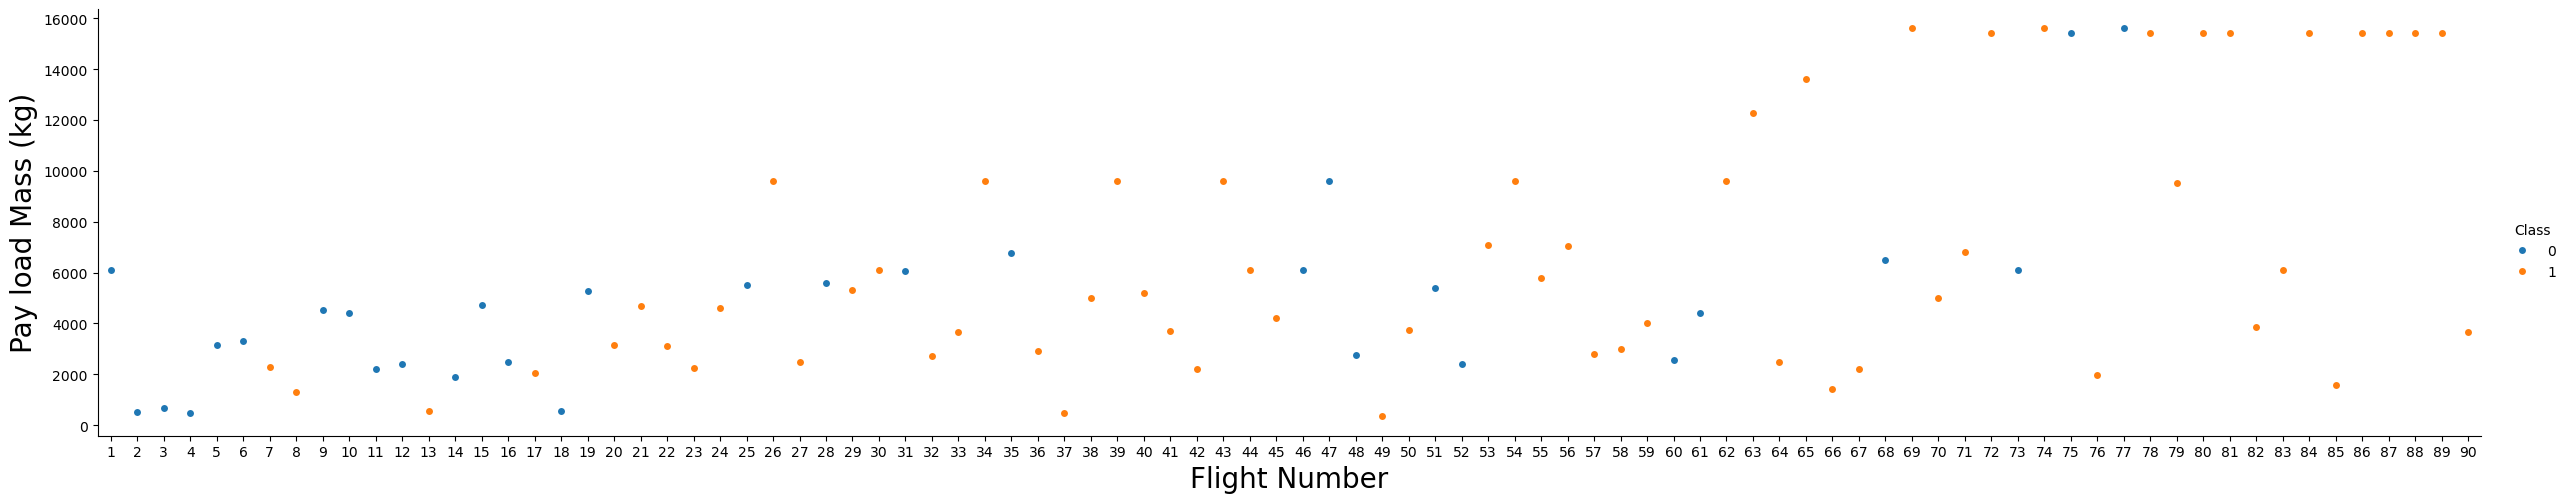

In [49]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

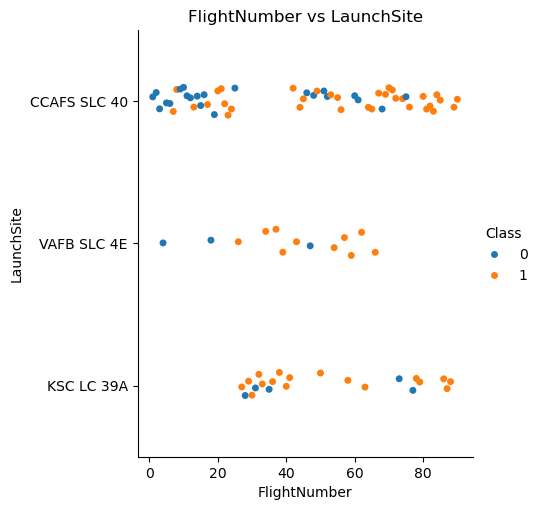

In [50]:
# Plot FlightNumber vs LaunchSite with hue as 'Class'
sns.catplot(data=df, x='FlightNumber', y='LaunchSite', hue='Class', kind='strip')
plt.title('FlightNumber vs LaunchSite')
plt.show()


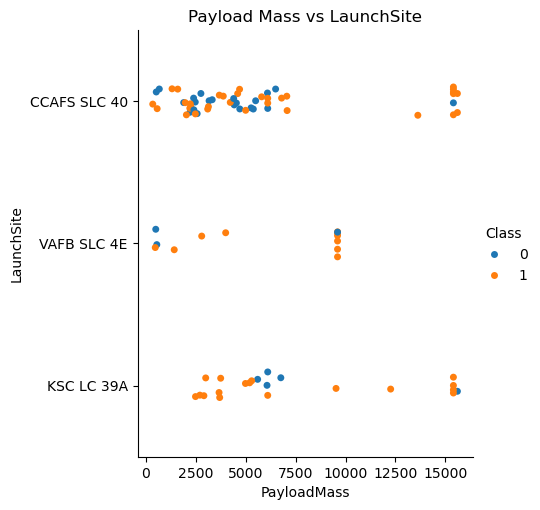

In [51]:
# Plot Payload Mass vs LaunchSite with hue as 'Class'
sns.catplot(data=df, x='PayloadMass', y='LaunchSite', hue='Class', kind='strip')
plt.title('Payload Mass vs LaunchSite')
plt.show()


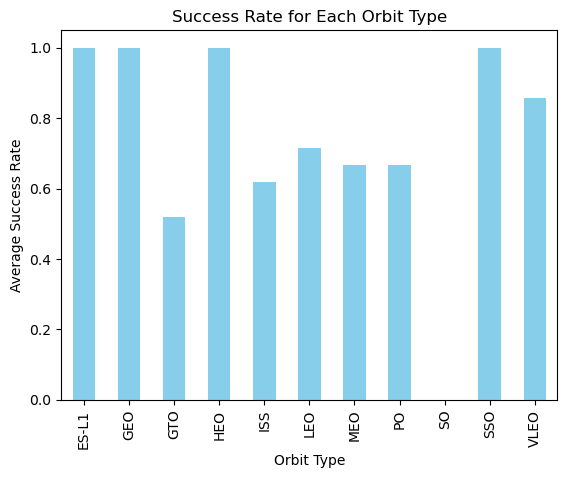

In [52]:
# Group by Orbit and get the mean of Class (success rate)
orbit_success_rate = df.groupby('Orbit')['Class'].mean()

# Plot the success rate for each Orbit type
orbit_success_rate.plot(kind='bar', color='skyblue')
plt.title('Success Rate for Each Orbit Type')
plt.ylabel('Average Success Rate')
plt.xlabel('Orbit Type')
plt.show()


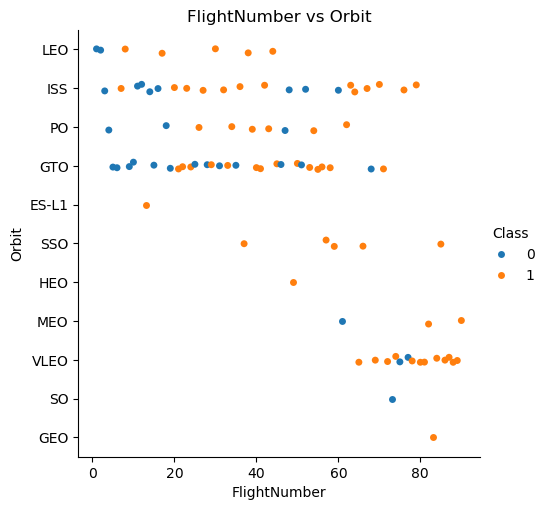

In [53]:
# Plot FlightNumber vs Orbit with hue as 'Class'
sns.catplot(data=df, x='FlightNumber', y='Orbit', hue='Class', kind='strip')
plt.title('FlightNumber vs Orbit')
plt.show()


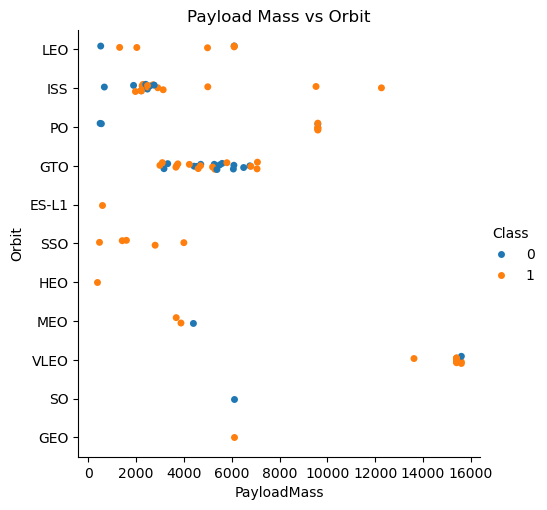

In [54]:
# Plot Payload Mass vs Orbit with hue as 'Class'
sns.catplot(data=df, x='PayloadMass', y='Orbit', hue='Class', kind='strip')
plt.title('Payload Mass vs Orbit')
plt.show()


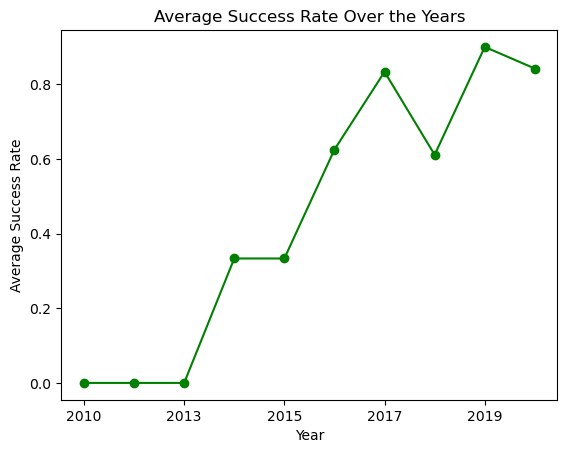

In [55]:
# A function to extract years from the 'Date' column
def Extract_year():
    year = []
    for i in df["Date"]:
        year.append(i.split("-")[0])  # Extract the year part
    return year

# Apply the function and add the year to the dataframe
df['Year'] = Extract_year()

# Now, group by Year and get the mean success rate for each year
yearly_success_rate = df.groupby('Year')['Class'].mean()

# Plot the trend of success rate over the years
yearly_success_rate.plot(kind='line', marker='o', color='green')
plt.title('Average Success Rate Over the Years')
plt.ylabel('Average Success Rate')
plt.xlabel('Year')
plt.show()


In [58]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [59]:
# Apply One-Hot Encoding to the specified columns
columns_to_encode = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']
features_one_hot = pd.get_dummies(df, columns=columns_to_encode)
print("Total number of columns after one-hot encoding:", features_one_hot.shape[1])

# Display the first few rows of the result to verify
features_one_hot.head()


Total number of columns after one-hot encoding: 87


,FlightNumber,Date,BoosterVersion,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,Block,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,2010-06-04,Falcon 9,6104.959412,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
1,2,2012-05-22,Falcon 9,525.000000,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
2,3,2013-03-01,Falcon 9,677.000000,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
3,4,2013-09-29,Falcon 9,500.000000,False Ocean,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
4,5,2013-12-03,Falcon 9,3170.000000,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False


In [60]:
# Step 1: Create the features dataframe with only the 13 specified columns
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite',
               'Flights', 'GridFins', 'Reused', 'Legs',
               'LandingPad', 'Block', 'ReusedCount', 'Serial']]

# Step 2: Apply one-hot encoding to only the specified categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Step 3: Print the number of columns
print("Total number of columns after one-hot encoding:", features_one_hot.shape[1])


Total number of columns after one-hot encoding: 80
